# Titanic - Kaggle Challenge

## Loading Modules and Files

In [111]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [112]:
df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')
sample_submission = pd.read_csv('datasets/gender_submission.csv')

## Exploratory Data Analysis

###  Data Summary

In [113]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [114]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [116]:
print('*'*50)
print('Training Data')
df_train.info()
print('*'*50)
print('Testing Data')
df_test.info()
print('*'*50)

**************************************************
Training Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
**************************************************
Testing Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Colum

In [117]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [118]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Missing Data

In [119]:
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

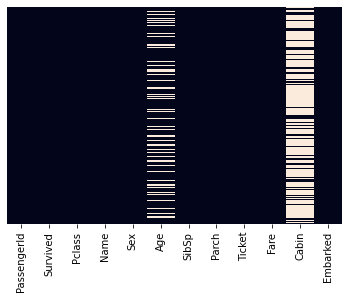

In [120]:
sns.heatmap(df_train.isnull(),yticklabels=False, cbar=False)
plt.show()

In [121]:
df_test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

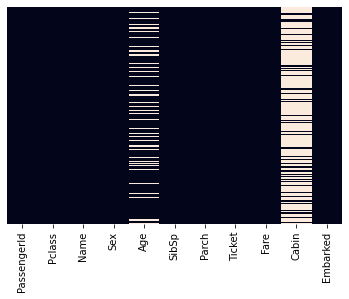

In [122]:
sns.heatmap(df_test.isnull(),yticklabels=False, cbar=False)
plt.show()

### Numeric Data Analytics

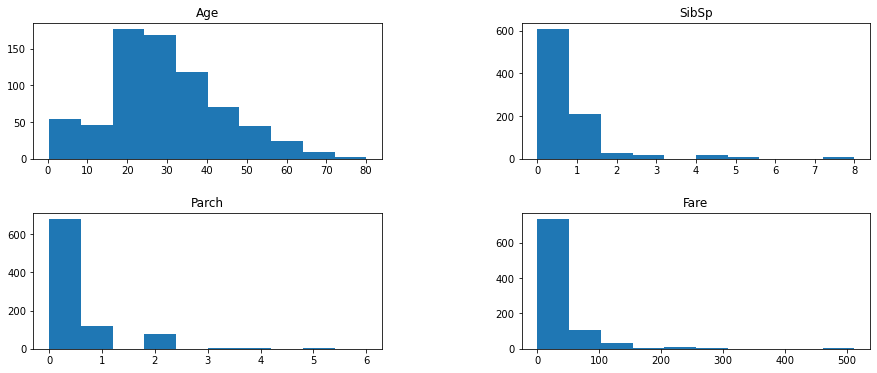

In [123]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(6)
fig.set_figwidth(15)

for cnt, cols in enumerate(df_train[['Age','SibSp','Parch','Fare']]):
    ax = fig.add_subplot(2, 2, cnt+1)
    ax.hist(df_train[cols])
    ax.title.set_text(cols)
plt.show()

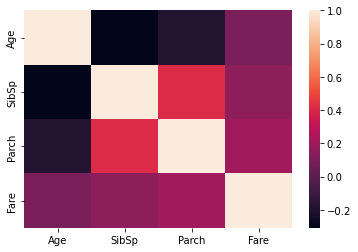

In [124]:
sns.heatmap(df_train[['Age','SibSp','Parch','Fare']].corr())
plt.show()

Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together

In [125]:
pd.pivot_table(df_train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


The inference we can draw from this table is:

1. The average age of survivors is 28, so young people tend to survive more.
2. People who paid higher fare rates were more likely to survive, more than double. This might be the people traveling in first-class. Thus the rich survived, which is kind of a sad story in this scenario.
3. In the 3rd column, If you have parents, you had a higher chance of surviving. So the parents might’ve saved the kids before themselves, thus explaining the rates
4. And if you are a child, and have siblings, you have less of a chance of surviving

### Catogorical Data Analytics

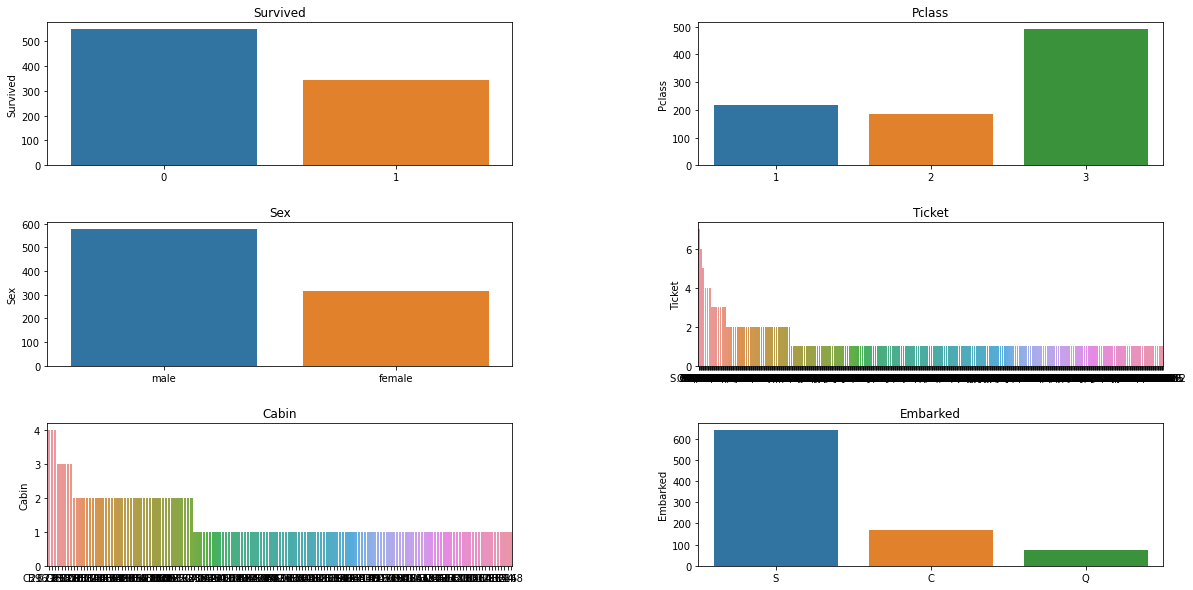

In [126]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(10)
fig.set_figwidth(20)

for cnt, cols in enumerate(df_train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]):
    ax = fig.add_subplot(3, 2, cnt+1)
    sns.barplot(df_train[cols].value_counts().index,df_train[cols].value_counts()).set_title(cols)
plt.show()


1. Survived: Most of the people died in the shipwreck,  only around 300 people survived.
2. Pclass: The majority of the people traveling, had tickets to the 3rd class.
3. Sex: There were more males than females aboard the ship, roughly double the amount.
4. Embarked: Most of the passengers boarded the ship from Southampton.
5. Ticket and Cabin have to feature engineer


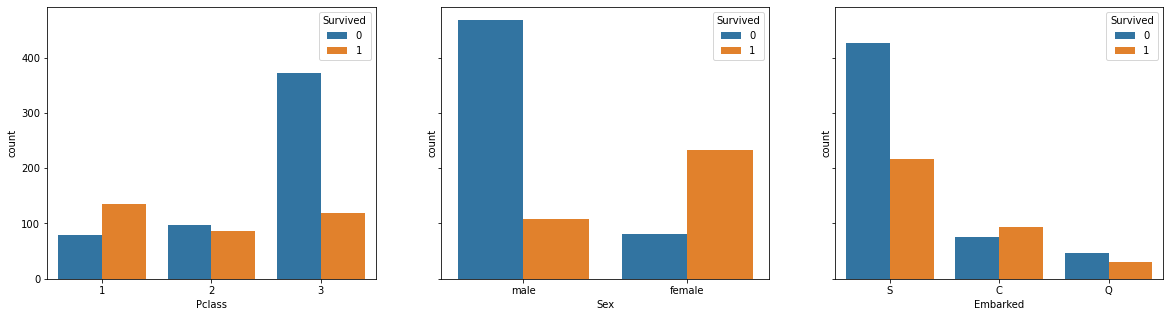

In [127]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

for cnt, cols in enumerate(df_train[['Pclass','Sex','Embarked']]):
    sns.countplot(ax=axes[cnt],x=cols,hue='Survived',data=df_train)
plt.show()


In [128]:
print('*'*50)
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print('*'*50)
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print('*'*50)
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))
print('*'*50)

**************************************************
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
**************************************************
Sex       female  male
Survived              
0             81   468
1            233   109
**************************************************
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
**************************************************


1. Pclass: Here we can see a lot more people survived from the First class than the Second or the Third class, even though the total number of passengers in the First class was much much less than the Third class. Thus our previous assumption that the rich survived is confirmed here, which might be relevant to model building.
2. Sex: Most of the women survived, and the majority of the male died in the shipwreck. So it looks like the saying “Woman and children first” actually applied in this scenario.
3. Embarked: This doesn’t seem much relevant, maybe if someone was from “Cherbourg” had a higher chance of surviving.

## Data Cleaning, Filling and Transforming

In [129]:
training = df_train.copy()
test = df_test.copy()

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN

all_data = pd.concat([training,test])

del training
del test

### Deriving Data

In [130]:
all_data['Name_Title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [131]:
all_data['No_Of_Cabin'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [132]:
all_data['Cabin_Compartment'] = all_data.Cabin.apply(lambda x: 'NoCabin' if pd.isna(x) else str(x)[0])

In [133]:
all_data['Special_Ticket'] = all_data.Ticket.apply(lambda x: 0 if x.isnumeric() else 1)

In [135]:
def categoring_ticket(x):
    if x.Special_Ticket == 1:
        search = re.search('\d+',x.Ticket)
        if search:
            match = re.match('^(.*)\s+\d.*',x.Ticket)
            return match.group(1)
        else:
            return x.Ticket
    else:
        return 'Normal'

all_data['Ticket_Category'] = all_data.apply(lambda x: categoring_ticket(x), axis =1)

### Filling Missing Values

In [136]:
title_age_groupby = all_data.groupby(['Name_Title'])['Age'].transform('median')
all_data['Age'] = all_data['Age'].fillna(title_age_groupby)

In [137]:
pnc_embarked_groupby = all_data.groupby(['Pclass','Name_Title','Cabin_Compartment'])['Embarked'].agg(pd.Series.mode)
pnc_embarked_df = pnc_embarked_groupby.to_frame()
def embarked_cat_group(x):
    if pd.isnull(x.Embarked):
        return pnc_embarked_df.loc[(x.Pclass,x.Name_Title, x.Cabin_Compartment)][0]
    else:
        return x.Embarked
all_data['Embarked'] = all_data.apply(lambda x: embarked_cat_group(x), axis =1)

In [138]:
pnec_fare_groupby = all_data.groupby(['Pclass','Name_Title','Embarked','Cabin_Compartment'])['Fare'].transform('median')
all_data['Fare'] = all_data['Fare'].fillna(pnec_fare_groupby)

### Verifying Missing Values

In [139]:
all_data.isnull().sum().sort_values(ascending=False)

Cabin                1014
Survived              418
PassengerId             0
Special_Ticket          0
Cabin_Compartment       0
No_Of_Cabin             0
Name_Title              0
train_test              0
Embarked                0
Fare                    0
Ticket                  0
Parch                   0
SibSp                   0
Age                     0
Sex                     0
Name                    0
Pclass                  0
Ticket_Category         0
dtype: int64

### Cleaning Data

In [140]:
all_data.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)

### Normalization

In [141]:
nz_on_cols = ['Age','SibSp','Parch','Fare','No_Of_Cabin']
nz_on_cols = all_data[nz_on_cols].columns[:]

In [142]:
scaler_feature = all_data.copy()
features = scaler_feature[nz_on_cols]
features.head()

,Age,SibSp,Parch,Fare,No_Of_Cabin
0,22.0,1,0,7.2500,0
1,38.0,1,0,71.2833,1
2,26.0,0,0,7.9250,0
3,35.0,1,0,53.1000,1
4,35.0,0,0,8.0500,0


In [143]:
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaler_feature[nz_on_cols] = features
scaler_feature.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,Name_Title,No_Of_Cabin,Cabin_Compartment,Special_Ticket,Ticket_Category
0,0.0,3,male,-0.564835,0.481288,-0.445,-0.503174,S,1,Mr,-0.473860,NoCabin,1,A/5
1,1.0,1,female,0.651087,0.481288,-0.445,0.734810,C,1,Mrs,1.268508,C,1,PC
2,1.0,3,female,-0.260855,-0.479087,-0.445,-0.490124,S,1,Miss,-0.473860,NoCabin,1,STON/O2.
3,1.0,1,female,0.423101,0.481288,-0.445,0.383264,S,1,Mrs,1.268508,C,0,Normal
4,0.0,3,male,0.423101,-0.479087,-0.445,-0.487707,S,1,Mr,-0.473860,NoCabin,0,Normal


In [144]:
print(scaler_feature.shape)

(1309, 14)


In [145]:
scaler_feature.dtypes

Survived             float64
Pclass                 int64
Sex                   object
Age                  float64
SibSp                float64
Parch                float64
Fare                 float64
Embarked              object
train_test             int64
Name_Title            object
No_Of_Cabin          float64
Cabin_Compartment     object
Special_Ticket         int64
Ticket_Category       object
dtype: object

### Category Encoding

In [146]:
for col_name in ['Pclass','Special_Ticket']: 
    scaler_feature[col_name] = scaler_feature[col_name].astype(object)

In [147]:
scaler_feature = pd.get_dummies(scaler_feature,drop_first=True)

In [148]:
print(scaler_feature.shape)

(1309, 89)


In [149]:
scaler_feature.head()

,Survived,Age,SibSp,Parch,Fare,train_test,No_Of_Cabin,Pclass_2,Pclass_3,Sex_male,...,Ticket_Category_SOTON/O2,Ticket_Category_SOTON/OQ,Ticket_Category_STON/O 2.,Ticket_Category_STON/O2.,Ticket_Category_STON/OQ.,Ticket_Category_SW/PP,Ticket_Category_W./C.,Ticket_Category_W.E.P.,Ticket_Category_W/C,Ticket_Category_WE/P
0,0.0,-0.564835,0.481288,-0.445,-0.503174,1,-0.473860,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.651087,0.481288,-0.445,0.734810,1,1.268508,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,-0.260855,-0.479087,-0.445,-0.490124,1,-0.473860,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1.0,0.423101,0.481288,-0.445,0.383264,1,1.268508,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.423101,-0.479087,-0.445,-0.487707,1,-0.473860,0,1,1,...,0,0,0,0,0,0,0,0,0,0


## Model Validation

In [150]:
train_df = scaler_feature[scaler_feature.train_test == 1]
test_df = scaler_feature[scaler_feature.train_test == 0]
train_df.drop(['train_test'],axis=1,inplace=True)
test_df.drop(['train_test','Survived'],axis=1,inplace=True)
print(train_df.shape)
print(test_df.shape)
Y = train_df['Survived']
X = train_df.drop(['Survived'], axis=1)

(891, 88)
(418, 87)


### Spliting Train Data

In [151]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=123)
print(x_train.shape, x_test. shape, y_train.shape, y_test. shape)

(801, 87) (90, 87) (801,) (90,)


### Model Creation On Split Data

In [152]:
log_reg_split_data= LogisticRegression()

In [153]:
log_reg_split_data.fit(x_train,y_train)

LogisticRegression()

In [154]:
prediction_y_test = log_reg_split_data.predict(x_test)
prediction_y_test

array([1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.])

### Model Acurracy On Split Data

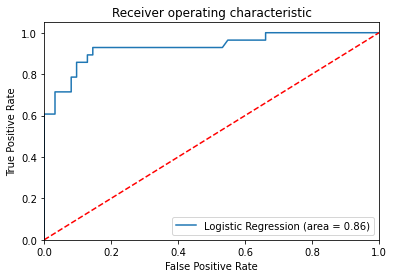

In [155]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg_split_data.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg_split_data.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_y_test))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91        62
         1.0       0.79      0.82      0.81        28

    accuracy                           0.88        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.88      0.88      0.88        90



In [157]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction_y_test))

[[56  6]
 [ 5 23]]


In [158]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test, prediction_y_test)*100,2),'%')

87.78 %


### Model Creation On Train Data

In [159]:
log_reg_train_data= LogisticRegression()

In [160]:
log_reg_split_data.fit(X,Y)

LogisticRegression()

In [161]:
prediction_test = log_reg_split_data.predict(test_df)
prediction_test

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

#### Submission

In [162]:
sample_submission
print(sample_submission.shape)
print(sample_submission.dtypes)
sample_submission.head()

(418, 2)
PassengerId    int64
Survived       int64
dtype: object


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [72]:
submission = df_test['PassengerId'].to_frame()
submission['Survived'] = prediction_test.astype('int64')
print(submission.shape)
print(submission.dtypes)
submission.head()

(418, 2)
PassengerId    int64
Survived       int64
dtype: object


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [80]:
dt = datetime.now().strftime('%Y%m%d')
submission.to_csv(f'submission/logistic_regression_{dt}.csv',index=False)

In [82]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))



ACCURACY OF THE MODEL:  0.8333333333333334
